In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## NEURALNETWORKSANDDEEPLEARNING/MODELPERFORMANCEANDFIT/NEURALNETWORKSANDDEEPLEARNING MODELPERFORMANCEANDFIT 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [2]:
#=================================================-
#### Slide 12: Loading packages  ####

# Helper packages.
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt                     
import numpy as np
import math
import seaborn as sns

# Scikit-learn packages.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
# TensorFlow and supporting packages.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [3]:
#=================================================-
#### Slide 13: Directory settings  ####

from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)




/Users/matskarz/Skillsoft-Content/IntrotoNeural_Networks
/Users/matskarz/Skillsoft-Content/IntrotoNeural_Networks/data


In [4]:
#=================================================-
#### Slide 14: Load the data  ####

credit_card = pd.read_csv(str(data_dir) + "/credit_card_data.csv")
print(credit_card.head())




   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
0         0         0   

In [5]:
#=================================================-
#### Slide 17: Data prep: convenience function - cont'd  ####

def data_prep(df):
    
    # Fill missing values with mean 
    df = df.fillna(df.mean()['BILL_AMT1'])

    # Drop an unnecessary identifier column.
    df = df.drop('ID',axis = 1)

    # Convert 'sex' into dummy variables.
    sex = pd.get_dummies(df['SEX'], prefix = 'sex', drop_first = True)
    # Convert 'education' into dummy variables.
    education = pd.get_dummies(df['EDUCATION'], prefix = 'education', drop_first = True)
    # Convert 'marriage' into dummy variables.
    marriage = pd.get_dummies(df['MARRIAGE'], prefix = 'marriage', drop_first = True)

    # Drop `sex`, `education`, `marriage` from the data.
    df.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis = 1, inplace = True)

    # Concatenate `sex`, `education`, `marriage` dummies to our dataset.
    df = pd.concat([df, sex, education, marriage], axis=1)
    
    # Separate predictors from data.
    X = df.drop(['default_payment_next_month'], axis=1)

    # Separate target from data.
    y = df['default_payment_next_month']

    # Set the seed to 1.
    np.random.seed(1)
    
    # Split data into train, test, and validation set, use a 70 - 15 - 15 split.
    # First split data into train-test with 70% for train and 30% for test.
    X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                        y,
                                                        test_size = .3,
                                                        random_state = 1)
    
    # Then split the test data into two halves: test and validation. 
    X_test, X_val, y_test, y_val = train_test_split(X_test,
                                                    y_test,
                                                    test_size = .5,
                                                    random_state = 1)
                                                    
    print("Train shape:", X_train.shape, "Test shape:", X_test.shape, "Val shape:", X_val.shape)
    
    # Transforms features by scaling each feature to a given range.
    # The default is the range between 0 and 1.
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_scaled = min_max_scaler.fit_transform(X_train)
    X_test_scaled = min_max_scaler.transform(X_test)
    X_val_scaled = min_max_scaler.transform(X_val)
    
    return X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val




In [6]:
#=================================================-
#### Slide 18: Data prep  ####

X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val = data_prep(credit_card)




Train shape: (21000, 30) Test shape: (4500, 30) Val shape: (4500, 30)


In [7]:
#=================================================-
#### Slide 19: Define and compile a sequential model  ####

def create_model(lr=.01):
    # Let's set the seed so that we can reproduce the results.
    tf.random.set_seed(1)
    model = Sequential([layers.Dense(32, activation='relu', input_dim=30),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [8]:
#=================================================-
#### Slide 20: Default learning rate  ####

lr_default = create_model().fit(X_train_scaled, y_train, epochs=25,
                                validation_data=(X_val_scaled,y_val))

Epoch 1/25


2022-11-18 12:27:54.549437: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 12:27:54.635744: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


657/657 [==============================] - 1s 1ms/step - loss: 0.4713 - accuracy: 0.8037 - val_loss: 0.4522 - val_accuracy: 0.8196
Epoch 2/25
657/657 [==============================] - 1s 988us/step - loss: 0.4514 - accuracy: 0.8146 - val_loss: 0.4504 - val_accuracy: 0.8162
Epoch 3/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4485 - accuracy: 0.8182 - val_loss: 0.4433 - val_accuracy: 0.8191
Epoch 4/25
657/657 [==============================] - 1s 990us/step - loss: 0.4448 - accuracy: 0.8178 - val_loss: 0.4385 - val_accuracy: 0.8204
Epoch 5/25
657/657 [==============================] - 1s 962us/step - loss: 0.4434 - accuracy: 0.8170 - val_loss: 0.4526 - val_accuracy: 0.8213
Epoch 6/25
657/657 [==============================] - 1s 943us/step - loss: 0.4434 - accuracy: 0.8194 - val_loss: 0.4379 - val_accuracy: 0.8182
Epoch 7/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4413 - accuracy: 0.8176 - val_loss: 0.4346 - val_accuracy: 0.8236
Epoch 8/2

In [9]:
#=================================================-
#### Slide 21: High learning rate  ####

# Set learning rate to 0.75.
lr_high = create_model(lr=.75).fit(X_train_scaled, y_train,  
                                     epochs = 25,            
                                     validation_data=(X_val_scaled, y_val))
                                                




Epoch 1/25
657/657 [==============================] - 1s 2ms/step - loss: 0.7017 - accuracy: 0.7790 - val_loss: 0.5284 - val_accuracy: 0.7798
Epoch 2/25
657/657 [==============================] - 1s 1ms/step - loss: 0.5374 - accuracy: 0.7792 - val_loss: 0.5272 - val_accuracy: 0.7798
Epoch 3/25
657/657 [==============================] - 1s 969us/step - loss: 0.5403 - accuracy: 0.7792 - val_loss: 0.6030 - val_accuracy: 0.7798
Epoch 4/25
657/657 [==============================] - 1s 1ms/step - loss: 0.5418 - accuracy: 0.7792 - val_loss: 0.5396 - val_accuracy: 0.7798
Epoch 5/25
657/657 [==============================] - 1s 939us/step - loss: 0.5402 - accuracy: 0.7792 - val_loss: 0.5282 - val_accuracy: 0.7798
Epoch 6/25
657/657 [==============================] - 1s 1ms/step - loss: 0.5387 - accuracy: 0.7792 - val_loss: 0.5796 - val_accuracy: 0.7798
Epoch 7/25
657/657 [==============================] - 1s 948us/step - loss: 0.5388 - accuracy: 0.7792 - val_loss: 0.5364 - val_accuracy: 0.7798


In [10]:
#=================================================-
#### Slide 22: Low learning rate  ####

lr_low = create_model(lr=.0001).fit(X_train_scaled, y_train,
                                    epochs = 50, #<- increase the number of epochs
                                    validation_data=(X_val_scaled, y_val))
                                                




Epoch 1/50
657/657 [==============================] - 1s 973us/step - loss: 0.5540 - accuracy: 0.7739 - val_loss: 0.5131 - val_accuracy: 0.7798
Epoch 2/50
657/657 [==============================] - 1s 833us/step - loss: 0.5061 - accuracy: 0.7792 - val_loss: 0.4983 - val_accuracy: 0.7800
Epoch 3/50
657/657 [==============================] - 0s 758us/step - loss: 0.4913 - accuracy: 0.7805 - val_loss: 0.4844 - val_accuracy: 0.7862
Epoch 4/50
657/657 [==============================] - 0s 751us/step - loss: 0.4813 - accuracy: 0.7853 - val_loss: 0.4771 - val_accuracy: 0.7984
Epoch 5/50
657/657 [==============================] - 1s 877us/step - loss: 0.4751 - accuracy: 0.7945 - val_loss: 0.4708 - val_accuracy: 0.8004
Epoch 6/50
657/657 [==============================] - 1s 927us/step - loss: 0.4706 - accuracy: 0.7990 - val_loss: 0.4670 - val_accuracy: 0.8038
Epoch 7/50
657/657 [==============================] - 1s 990us/step - loss: 0.4676 - accuracy: 0.8024 - val_loss: 0.4645 - val_accuracy:

In [11]:
#=================================================-
#### Slide 23: Visualize results for learning rates  ####

learn_rates = []

for exp, result in zip([lr_default, lr_low, lr_high], [".01", ".0001", ".75"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result

    learn_rates.append(df)

df_learning = pd.concat(learn_rates)
df_learning['Learning Rate'] = df_learning['Learning Rate'].astype('str')




<AxesSubplot: xlabel='epoch', ylabel='val_loss'>

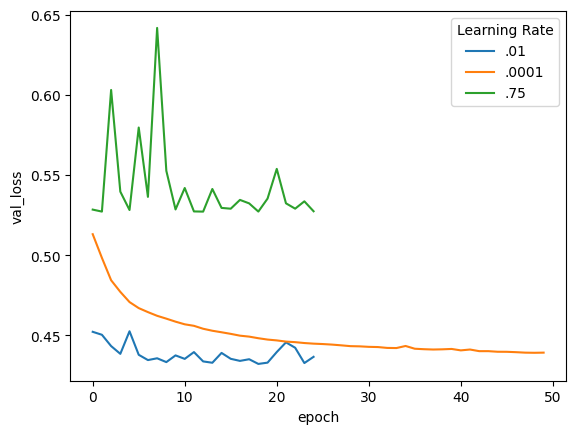

In [12]:
#=================================================-
#### Slide 24: Visualize results for learning rates (cont'd)  ####

sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df_learning)




<AxesSubplot: xlabel='epoch', ylabel='val_accuracy'>

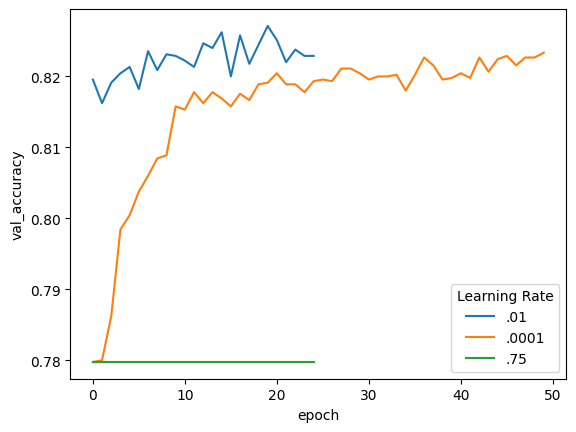

In [13]:
#=================================================-
#### Slide 25: Visualize results for learning rates (cont'd)  ####

sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df_learning)


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [14]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## NEURALNETWORKSANDDEEPLEARNING/MODELPERFORMANCEANDFIT/NEURALNETWORKSANDDEEPLEARNING MODELPERFORMANCEANDFIT 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [15]:
#=================================================-
#### Slide 4: Define and compile a sequential model  ####

def create_model(lr=.001):
    # Let's set the seed so that we can reproduce the results.
    tf.random.set_seed(1)
    opt = Adam(learning_rate=lr) # <- set optimizer
    model = Sequential([
        layers.Dense(32, activation='relu', input_dim=30),#<- set input and 1st hidden layer
        layers.Dense(32, activation='relu'),              #<- set 2nd hidden layer
        layers.Dense(1, activation='sigmoid')             #<- set output layer
    ])
    model.compile(optimizer = opt,            #<- set optimizer
                  loss='binary_crossentropy', #<- set loss function to binary_crossentropy
                  metrics=['accuracy'])       #<- set performance metric
    return model

In [16]:
#=================================================-
#### Slide 6: Default batch size  ####

model = create_model()
bt_default = model.fit(X_train_scaled, y_train,                  #<- train data and labels
                       epochs=25,                              #<- number of epochs
                       validation_data=(X_val_scaled, y_val))  #<- pass val data

Epoch 1/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4883 - accuracy: 0.7919 - val_loss: 0.4627 - val_accuracy: 0.8064
Epoch 2/25
657/657 [==============================] - 1s 920us/step - loss: 0.4584 - accuracy: 0.8070 - val_loss: 0.4559 - val_accuracy: 0.8104
Epoch 3/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4507 - accuracy: 0.8129 - val_loss: 0.4426 - val_accuracy: 0.8204
Epoch 4/25
657/657 [==============================] - 1s 925us/step - loss: 0.4460 - accuracy: 0.8141 - val_loss: 0.4411 - val_accuracy: 0.8209
Epoch 5/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4431 - accuracy: 0.8168 - val_loss: 0.4423 - val_accuracy: 0.8204
Epoch 6/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4417 - accuracy: 0.8191 - val_loss: 0.4368 - val_accuracy: 0.8227
Epoch 7/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4396 - accuracy: 0.8195 - val_loss: 0.4353 - val_accuracy: 0.8233
Ep

In [17]:
#=================================================-
#### Slide 7: Small batch size  ####

model = create_model()
bt_small = model.fit(X_train_scaled, y_train,                 #<- train data and labels
                      epochs=25,                              #<- number of epochs
                      batch_size=8,                           #<- set batch_size
                      validation_data=(X_val_scaled, y_val))  #<- pass val data

Epoch 1/25
2625/2625 [==============================] - 3s 964us/step - loss: 0.4750 - accuracy: 0.8002 - val_loss: 0.4533 - val_accuracy: 0.8200
Epoch 2/25
2625/2625 [==============================] - 2s 847us/step - loss: 0.4527 - accuracy: 0.8140 - val_loss: 0.4489 - val_accuracy: 0.8164
Epoch 3/25
2625/2625 [==============================] - 2s 855us/step - loss: 0.4464 - accuracy: 0.8172 - val_loss: 0.4416 - val_accuracy: 0.8253
Epoch 4/25
2625/2625 [==============================] - 2s 854us/step - loss: 0.4434 - accuracy: 0.8178 - val_loss: 0.4402 - val_accuracy: 0.8218
Epoch 5/25
2625/2625 [==============================] - 2s 913us/step - loss: 0.4408 - accuracy: 0.8183 - val_loss: 0.4435 - val_accuracy: 0.8229
Epoch 6/25
2625/2625 [==============================] - 2s 860us/step - loss: 0.4396 - accuracy: 0.8191 - val_loss: 0.4475 - val_accuracy: 0.8191
Epoch 7/25
2625/2625 [==============================] - 2s 828us/step - loss: 0.4377 - accuracy: 0.8195 - val_loss: 0.4364 -

In [18]:
#=================================================-
#### Slide 8: Large batch size  ####

model = create_model()
bt_large = model.fit(X_train_scaled, y_train,   #<- train data + labels
                      epochs=25,              #<- number of epochs
                      batch_size=128,          #<- set batch_size
                      validation_data=(X_val_scaled, y_val))  #<- val data + labels

Epoch 1/25
165/165 [==============================] - 1s 2ms/step - loss: 0.5186 - accuracy: 0.7770 - val_loss: 0.4797 - val_accuracy: 0.7862
Epoch 2/25
165/165 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7970 - val_loss: 0.4614 - val_accuracy: 0.8136
Epoch 3/25
165/165 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8080 - val_loss: 0.4543 - val_accuracy: 0.8156
Epoch 4/25
165/165 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.8104 - val_loss: 0.4507 - val_accuracy: 0.8198
Epoch 5/25
165/165 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8117 - val_loss: 0.4474 - val_accuracy: 0.8191
Epoch 6/25
165/165 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8144 - val_loss: 0.4454 - val_accuracy: 0.8158
Epoch 7/25
165/165 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.8158 - val_loss: 0.4431 - val_accuracy: 0.8178
Epoch 

In [19]:
#=================================================-
#### Slide 9: Visualize results for various batch sizes  ####

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["32", "8", "128"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
  
    batch_sizes.append(df)

df_summary = pd.concat(batch_sizes)
df_summary['Batch Size'] = df_summary['Batch Size'].astype('str')




<AxesSubplot: xlabel='epoch', ylabel='val_accuracy'>

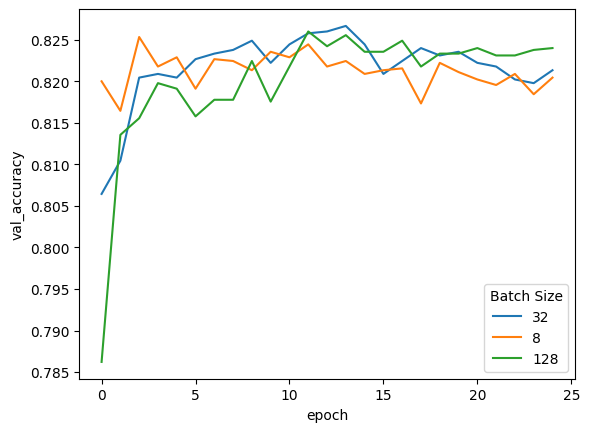

In [20]:
#=================================================-
#### Slide 10: Visualize results for various batch sizes - cont'd  ####


sns.lineplot(x='epoch', y='val_accuracy', 
             hue='Batch Size', data=df_summary)




<AxesSubplot: xlabel='epoch', ylabel='val_loss'>

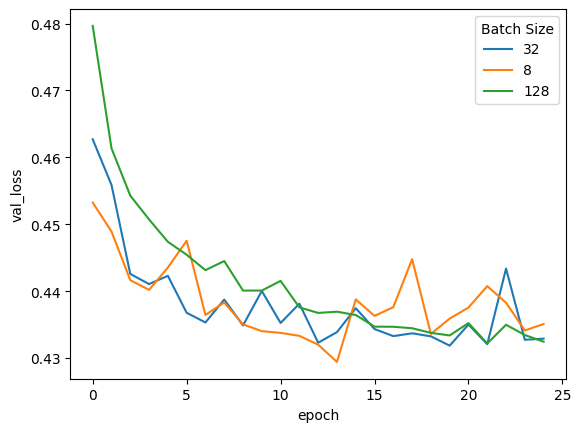

In [21]:
#=================================================-
#### Slide 11: Visualize results for various batch sizes - cont'd  ####

sns.lineplot(x='epoch', y='val_loss', 
             hue='Batch Size', data=df_summary)




In [22]:
#=================================================-
#### Slide 14: Higher number of epochs  ####

ep_high = create_model().fit(X_train_scaled, y_train,
                             epochs = 150,
                             validation_data=(X_val_scaled, y_val))
                                                




Epoch 1/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4883 - accuracy: 0.7919 - val_loss: 0.4627 - val_accuracy: 0.8064
Epoch 2/150
657/657 [==============================] - 1s 1ms/step - loss: 0.4584 - accuracy: 0.8070 - val_loss: 0.4559 - val_accuracy: 0.8104
Epoch 3/150
657/657 [==============================] - 1s 992us/step - loss: 0.4507 - accuracy: 0.8129 - val_loss: 0.4426 - val_accuracy: 0.8204
Epoch 4/150
657/657 [==============================] - 1s 935us/step - loss: 0.4460 - accuracy: 0.8141 - val_loss: 0.4411 - val_accuracy: 0.8209
Epoch 5/150
657/657 [==============================] - 1s 908us/step - loss: 0.4431 - accuracy: 0.8168 - val_loss: 0.4423 - val_accuracy: 0.8204
Epoch 6/150
657/657 [==============================] - 1s 931us/step - loss: 0.4417 - accuracy: 0.8191 - val_loss: 0.4368 - val_accuracy: 0.8227
Epoch 7/150
657/657 [==============================] - 1s 973us/step - loss: 0.4396 - accuracy: 0.8195 - val_loss: 0.4353 - val_accura

In [24]:
#### Slide 15: Medium number of epochs  ####

ep_medium = create_model().fit(X_train_scaled, y_train,
                               epochs = 100,
                               validation_data=(X_val_scaled, y_val))
                                                




Epoch 1/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4883 - accuracy: 0.7919 - val_loss: 0.4627 - val_accuracy: 0.8064
Epoch 2/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4584 - accuracy: 0.8070 - val_loss: 0.4559 - val_accuracy: 0.8104
Epoch 3/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4507 - accuracy: 0.8129 - val_loss: 0.4426 - val_accuracy: 0.8204
Epoch 4/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4460 - accuracy: 0.8141 - val_loss: 0.4411 - val_accuracy: 0.8209
Epoch 5/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4431 - accuracy: 0.8168 - val_loss: 0.4423 - val_accuracy: 0.8204
Epoch 6/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4417 - accuracy: 0.8191 - val_loss: 0.4368 - val_accuracy: 0.8227
Epoch 7/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4396 - accuracy: 0.8195 - val_loss: 0.4353 - val_accuracy: 0.8233

In [25]:
#=================================================-
#### Slide 16: Lower number of epochs  ####

ep_low = create_model().fit(X_train_scaled, y_train,
                            epochs = 25,
                            validation_data = (X_val_scaled, y_val))
                                                




Epoch 1/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4883 - accuracy: 0.7919 - val_loss: 0.4627 - val_accuracy: 0.8064
Epoch 2/25
657/657 [==============================] - 1s 961us/step - loss: 0.4584 - accuracy: 0.8070 - val_loss: 0.4559 - val_accuracy: 0.8104
Epoch 3/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4507 - accuracy: 0.8129 - val_loss: 0.4426 - val_accuracy: 0.8204
Epoch 4/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4460 - accuracy: 0.8141 - val_loss: 0.4411 - val_accuracy: 0.8209
Epoch 5/25
657/657 [==============================] - 1s 976us/step - loss: 0.4431 - accuracy: 0.8168 - val_loss: 0.4423 - val_accuracy: 0.8204
Epoch 6/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4417 - accuracy: 0.8191 - val_loss: 0.4368 - val_accuracy: 0.8227
Epoch 7/25
657/657 [==============================] - 1s 1ms/step - loss: 0.4396 - accuracy: 0.8195 - val_loss: 0.4353 - val_accuracy: 0.8233
Ep

In [26]:
#=================================================-
#### Slide 17: Visualize results for epoch sizes  ####

epoch_sizes = []

for exp, result in zip([ep_high, ep_medium, ep_low], ["150", "100", "25"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Number of epochs'] = result

  epoch_sizes.append(df)

df_epochs = pd.concat(epoch_sizes)
df_epochs['Number of epochs'] = df_epochs['Number of epochs'].astype('str')




<AxesSubplot: xlabel='epoch', ylabel='val_accuracy'>

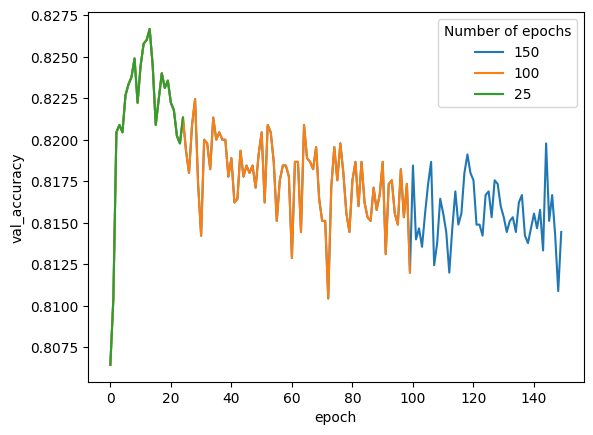

In [27]:
#=================================================-
#### Slide 18: Visualize results for epoch sizes (cont'd)  ####

sns.lineplot(x='epoch', y='val_accuracy', hue='Number of epochs', data=df_epochs)




<AxesSubplot: xlabel='epoch', ylabel='val_loss'>

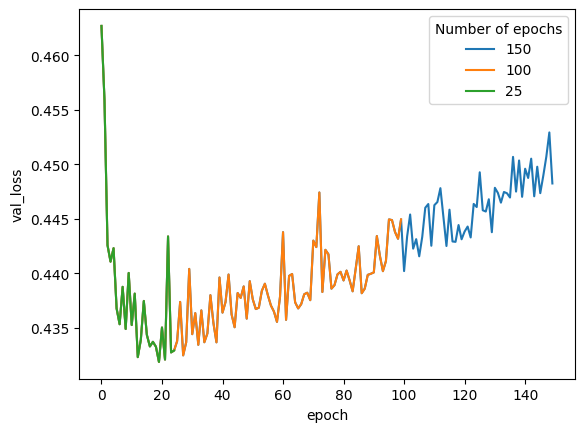

In [28]:
#=================================================-
#### Slide 19: Visualize results for epoch sizes (cont'd)  ####

sns.lineplot(x='epoch', y='val_loss', hue='Number of epochs', data=df_epochs)




In [29]:
#=================================================-
#### Slide 21: Exercise   ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [30]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## NEURALNETWORKSANDDEEPLEARNING/MODELPERFORMANCEANDFIT/NEURALNETWORKSANDDEEPLEARNING MODELPERFORMANCEANDFIT 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




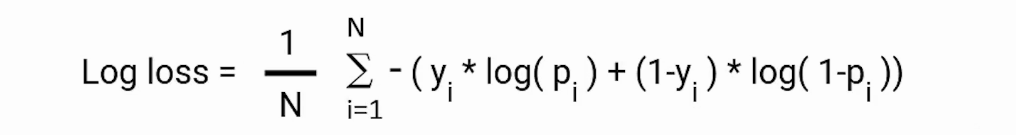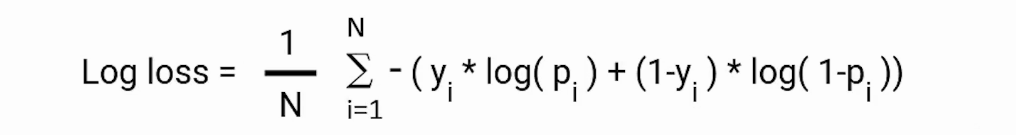

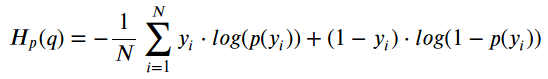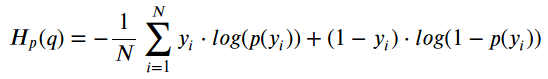

$$\Large Log loss=-\frac{1}{N}\sum _{i=1}^N[y_i\log {\hat y}_i+(1-y_i)\log(1-{\hat y}_i)]$$

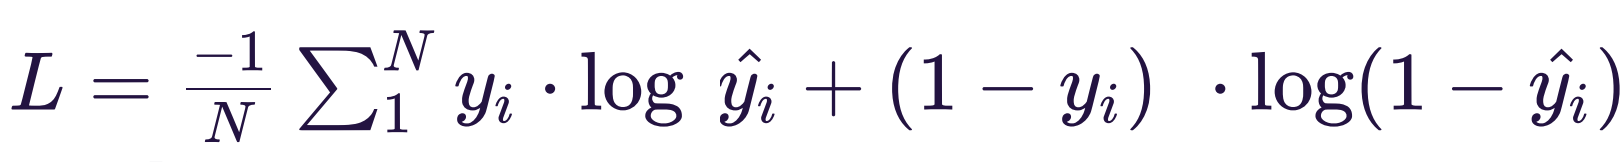

$$\Huge CategoricalCrossEntropy=-\frac{1}{N}\sum _{i=1}^Ny_i\log {\hat y}_i$$

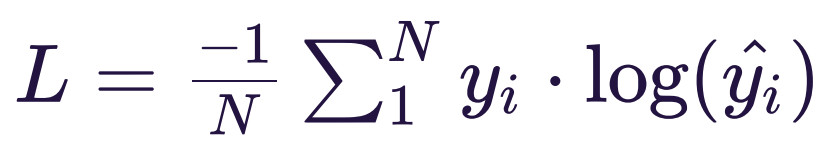

$$\Huge MAE=\frac{1}{n}\sum _{i=1}^n\left|y_i-\hat y_i\right|$$

In [31]:
#=================================================-
#### Slide 17: Generate some fake data  ####

TRUE_W = 3.5         #<- true weight
TRUE_b = 50.0        #<- true bias
NUM_EXAMPLES = 1000  #<- number of observations

# Simulate inputs and noise from normal distribution.
inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Compute the outputs based on our equation.
outputs = inputs * TRUE_W + TRUE_b + noise




In [32]:
#=================================================-
#### Slide 18: Neural network architecture  ####

# Define model.
class Model(object):

  def __init__(self):
    self.W = tf.Variable(8.0)   #<- initial weight
    self.b = tf.Variable(40.0)  #<- initial bias

  def __call__(self, x):
    return self.W * x + self.b #<- compute the equation
    
# Initialize the model.
model = Model()

# Check if it outputs correct results.
assert model(3.0).numpy() == 64.0





In [33]:
#=================================================-
#### Slide 19: Loss function  ####

# Define loss function.
def loss(target_y, predicted_y):
  "MSE"
  return tf.reduce_mean(tf.square(target_y - predicted_y))





Current loss: 123.358917


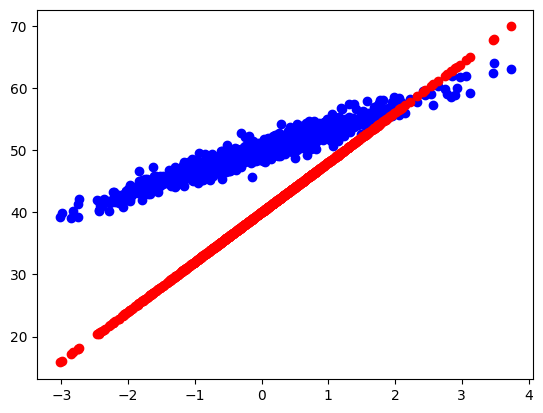

In [34]:
#=================================================-
#### Slide 20: Initial weights  ####

print('Current loss: %1.6f' % loss(model(inputs), 
       outputs).numpy())
plt.scatter(inputs, outputs, c = 'b')
plt.scatter(inputs, model(inputs), c = 'r')
plt.show()




In [35]:
#=================================================-
#### Slide 21: Update weights based on gradient  ####

# Define the train function for our NN.
def train(model, inputs, outputs, learning_rate):

  with tf.GradientTape() as t: 
     current_loss = loss(outputs, model(inputs)) #<- compute loss
  
  # Compute partial derivatives:
  # how much does a particular obvs + W + b contribute to that loss.
  dW, db = t.gradient(current_loss, [model.W, model.b]) 
  
  # Update with new weights and bias using our learning rate.
  model.W.assign_sub(learning_rate * dW) 
  model.b.assign_sub(learning_rate * db)





In [36]:
#=================================================-
#### Slide 22: Train the neural network  ####

model = Model()

# Store some history of weights.
Ws, bs = [], []
epochs = range(15)

for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))




Epoch  0: W=8.00 b=40.00 loss=123.35892
Epoch  1: W=7.00 b=41.99 loss=78.77587
Epoch  2: W=6.21 b=43.58 loss=50.46210
Epoch  3: W=5.60 b=44.86 loss=32.47135
Epoch  4: W=5.13 b=45.88 loss=21.03433
Epoch  5: W=4.76 b=46.70 loss=13.76029
Epoch  6: W=4.47 b=47.36 loss=9.13193
Epoch  7: W=4.25 b=47.89 loss=6.18576
Epoch  8: W=4.07 b=48.31 loss=4.30966
Epoch  9: W=3.94 b=48.65 loss=3.11453
Epoch 10: W=3.83 b=48.92 loss=2.35294
Epoch 11: W=3.75 b=49.13 loss=1.86747
Epoch 12: W=3.68 b=49.31 loss=1.55790
Epoch 13: W=3.63 b=49.45 loss=1.36045
Epoch 14: W=3.59 b=49.56 loss=1.23448


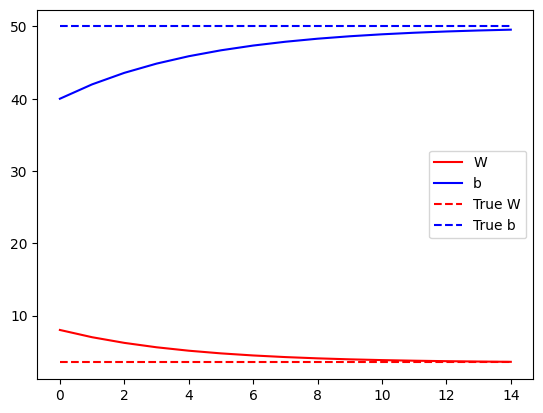

In [37]:
#=================================================-
#### Slide 23: Inspect the results  ####

plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()




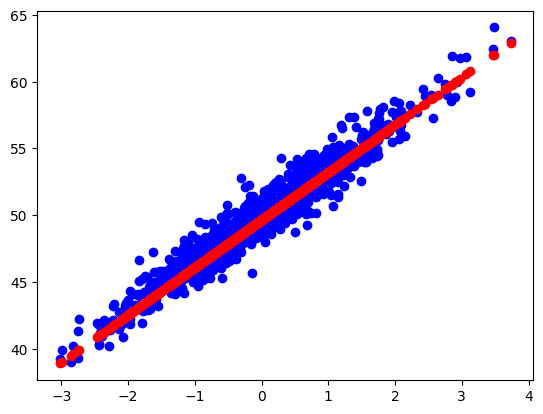

In [38]:
#=================================================-
#### Slide 24: Inspect the results (cont'd)  ####

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()




In [39]:
#=================================================-
#### Slide 25: Inspect the results (cont'd)  ####

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())



#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


Current loss: 1.154090


In [40]:
model = Sequential(
    [layers.Dense(32, input_shape=(X_train_scaled.shape[0], 6))]
    + [layers.Dense(i, activation="relu") for i in np.arange(32, 130, 8)]
    + [layers.Dense(i, activation="relu") for i in np.arange(120, 4, -8)]
    + [layers.Dense(2, activation="sigmoid")]
)

In [41]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 21000, 32)         224       
_________________________________________________________________
dense_28 (Dense)             (None, 21000, 32)         1056      
_________________________________________________________________
dense_29 (Dense)             (None, 21000, 40)         1320      
_________________________________________________________________
dense_30 (Dense)             (None, 21000, 48)         1968      
_________________________________________________________________
dense_31 (Dense)             (None, 21000, 56)         2744      
_________________________________________________________________
dense_32 (Dense)             (None, 21000, 64)         3648      
_________________________________________________________________
dense_33 (Dense)             (None, 21000, 72)        

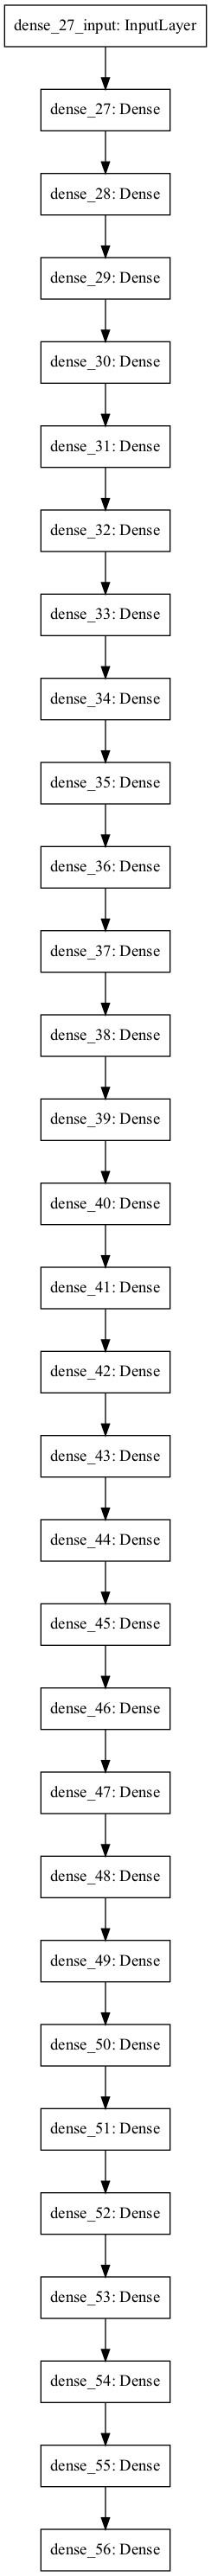

In [42]:
keras.utils.plot_model(model)